In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import find_peaks, argrelextrema
import matplotlib.pyplot as plt
import glob
import os
import re

In [2]:
hist_data = r'C:\Users\david\fall2024\capstone\SHAZAM-CAPSTONE\histograms\histogram_data\song01_histogram_data.csv'
new_data = r'C:\Users\david\fall2024\capstone\SHAZAM-CAPSTONE\msaf\msaf_dataset\01_uptown_funk\cbm\01_uptown_funk_cbm_cnmf.csv'

In [4]:
# Specify the directory containing the CSV files
csv_directory = r'C:\Users\david\fall2024\capstone\SHAZAM-CAPSTONE\fj396zz8014'

# Use glob to find all CSV files in the directory
f_paths = glob.glob(os.path.join(csv_directory, '*.csv'))
f_paths.sort(key=lambda x: int(os.path.basename(x).split('song')[1].split('.csv')[0]))

print(f_paths)

['C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song01.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song02.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song03.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song04.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song05.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song06.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song07.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song08.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song09.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song10.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song11.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song12.csv', 'C:\\Users\\dav

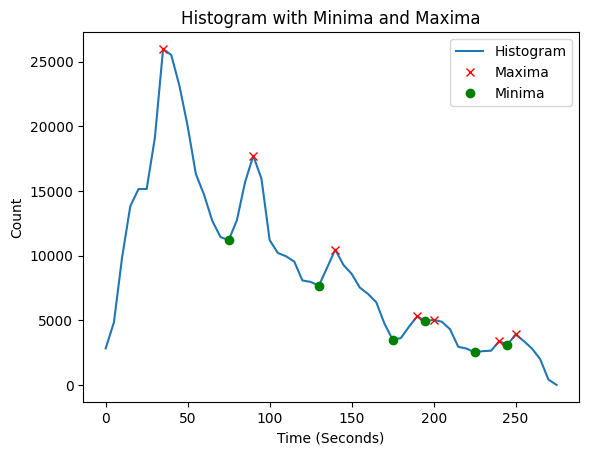

6
7


In [31]:
histogram_data = pd.read_csv(f_paths[1], nrows=500000)
histogram_data['Rounded_Offset'] = histogram_data['Offset'].round(0).astype(int)
offset_counts = histogram_data.groupby((histogram_data['Rounded_Offset'] // 4) * 4)['Rounded_Offset'].count().sort_index()

df = pd.DataFrame({
        'Second': offset_counts.index,
        'Count': offset_counts.values
    })

count = df['Count']
time = df['Second']
peaks, _ = find_peaks(count)

# Find troughs (minima)
troughs = argrelextrema(count.values, np.less)[0]

# Plot the histogram data along with the peaks and troughs
plt.plot(time, count, label='Histogram')
plt.plot(time[peaks], count[peaks], "x", label='Maxima', color='red')
plt.plot(time[troughs], count[troughs], "o", label='Minima', color='green')
plt.xlabel('Time (Seconds)')
plt.ylabel('Count')
plt.title('Histogram with Minima and Maxima')
plt.legend()
plt.show()

print(len(troughs))
print(len(peaks))

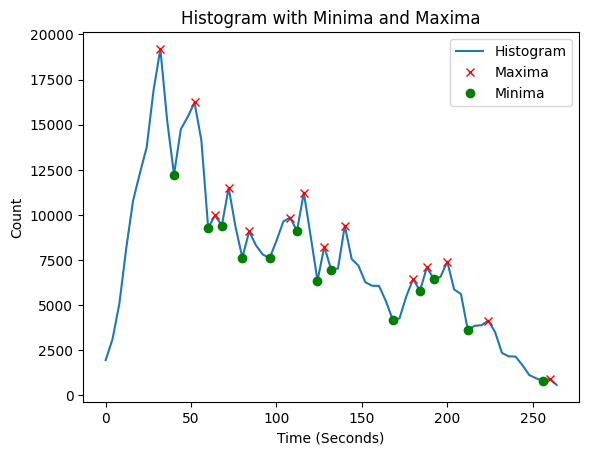

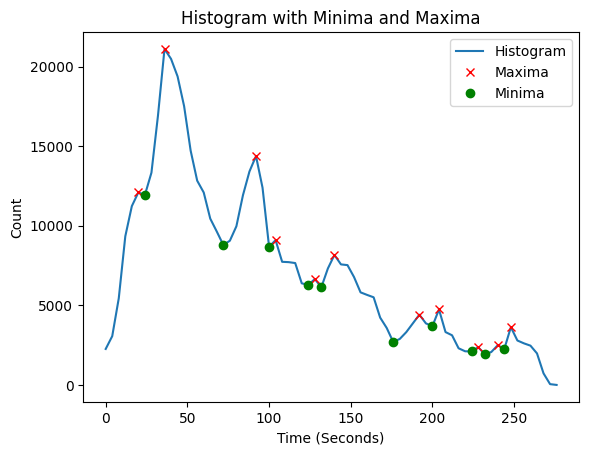

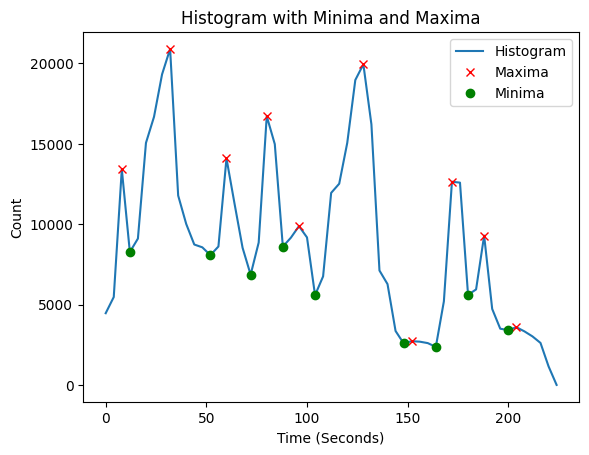

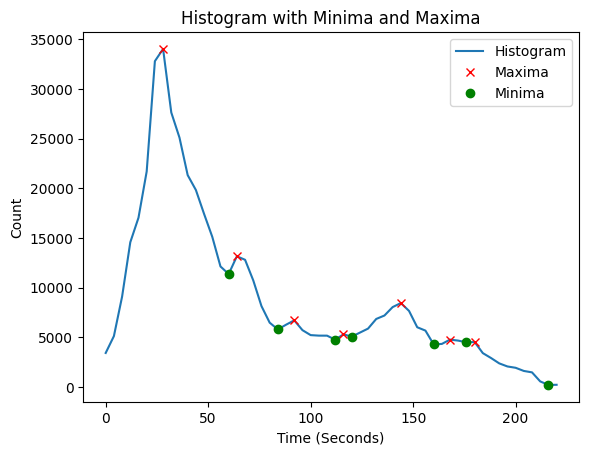

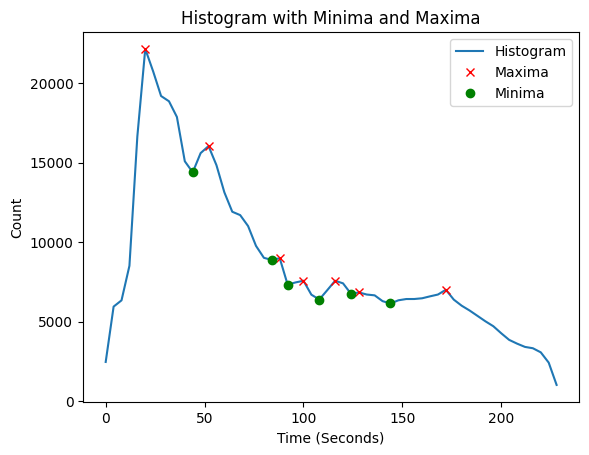

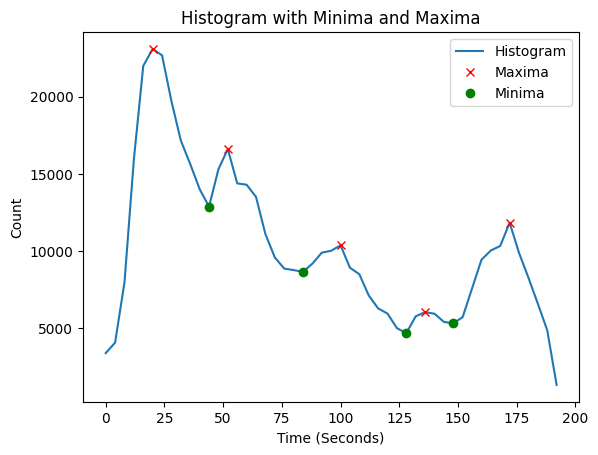

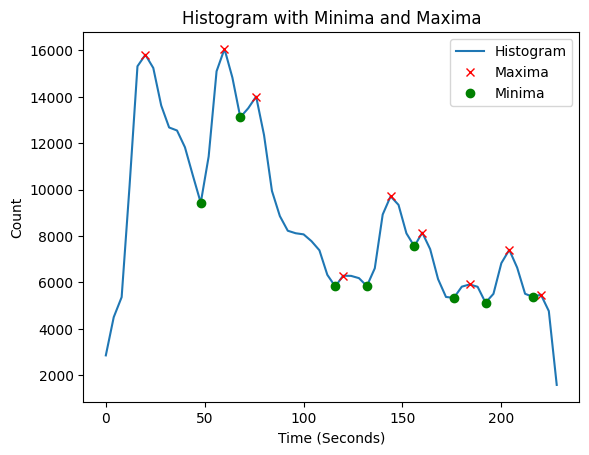

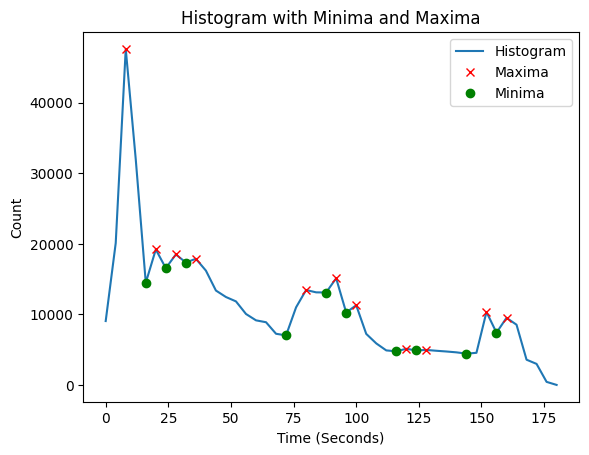

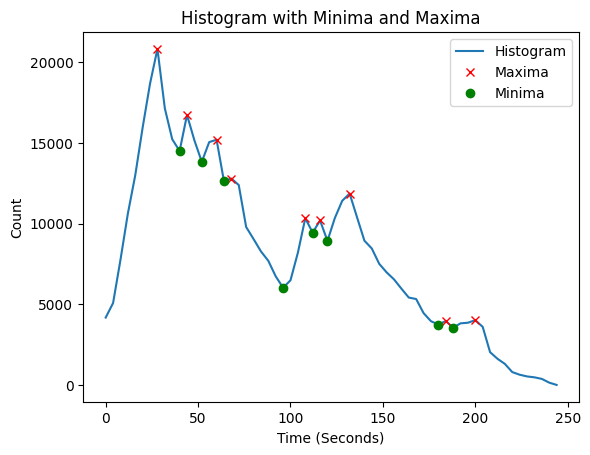

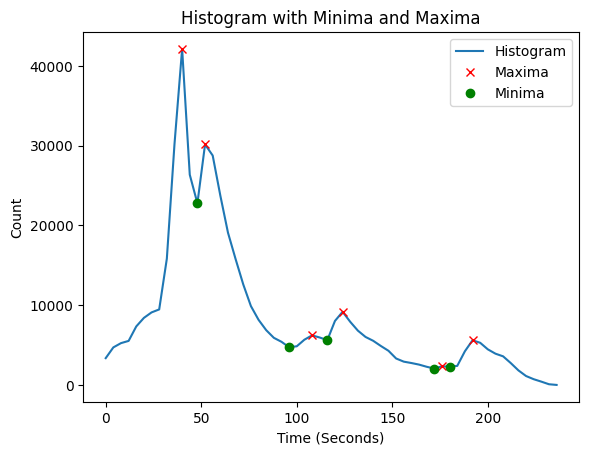

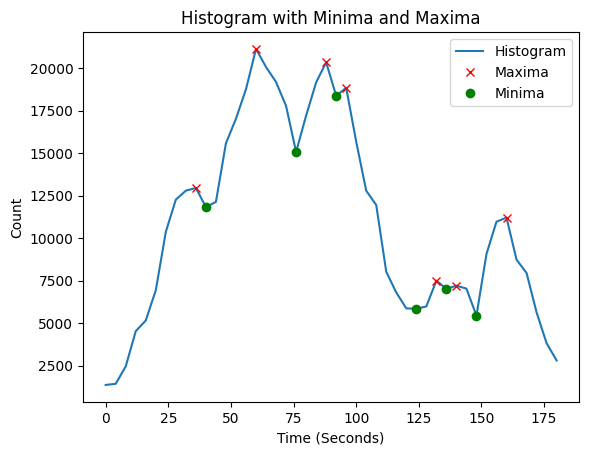

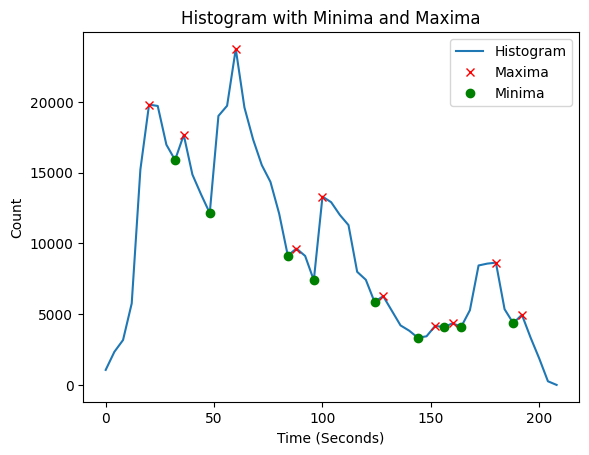

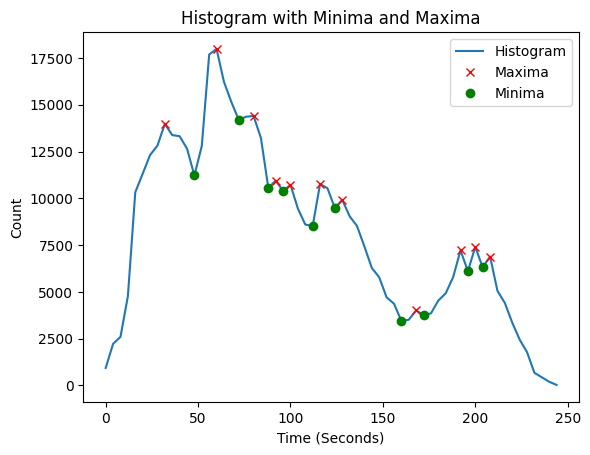

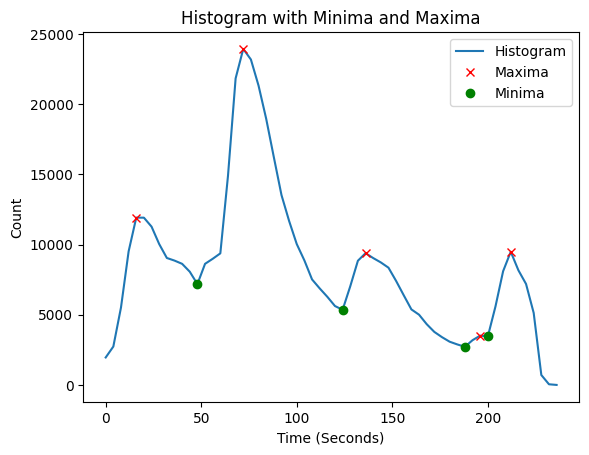

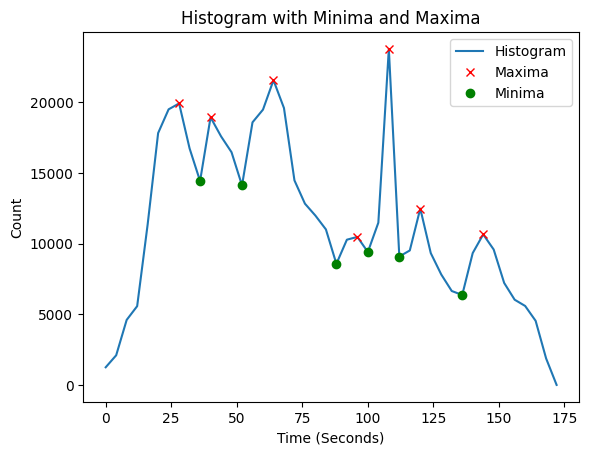

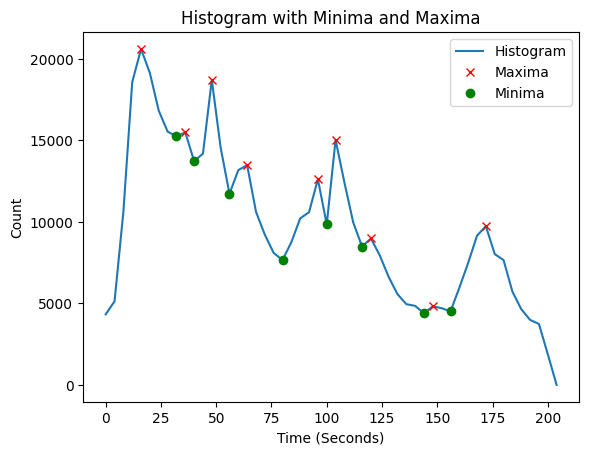

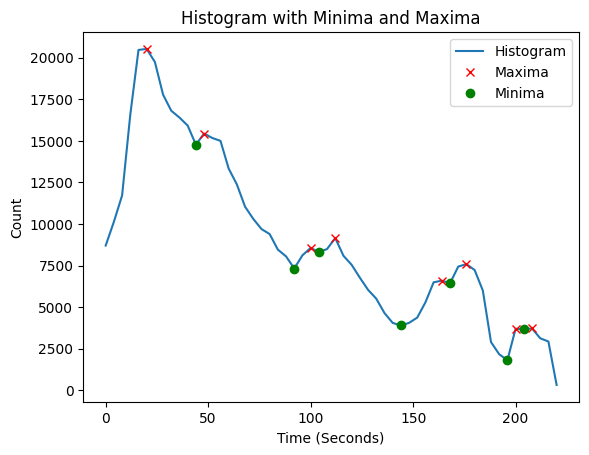

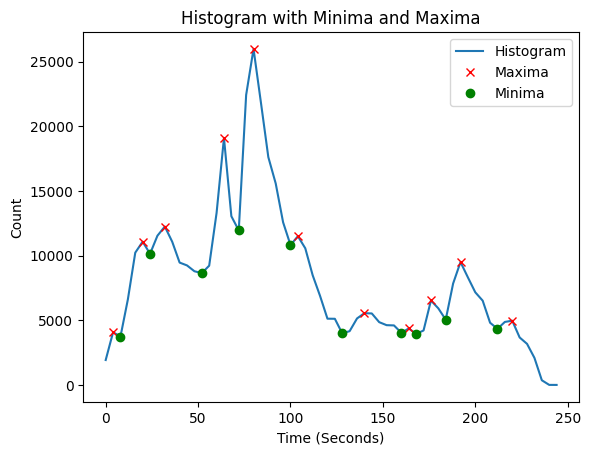

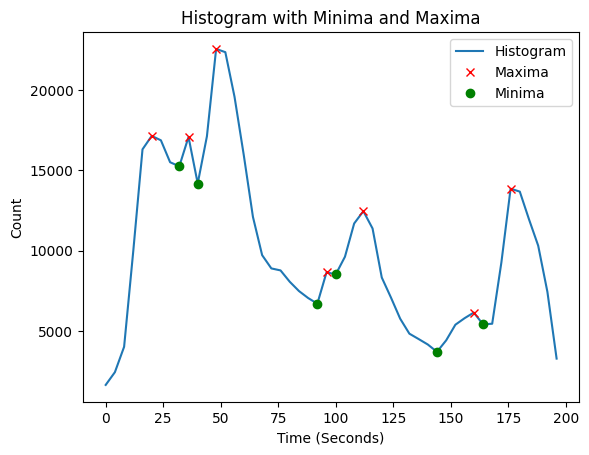

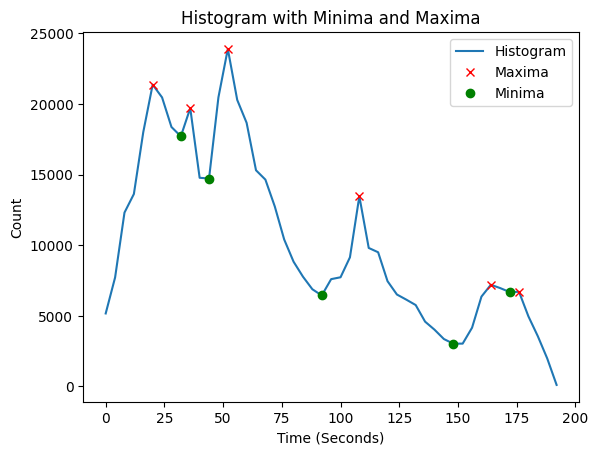

In [35]:
save_path = r'C:\Users\david\fall2024\capstone\SHAZAM-CAPSTONE\histograms\histogram_extrema'
for file in f_paths: 
    histogram_data = pd.read_csv(file, nrows=500000)
    histogram_data['Rounded_Offset'] = histogram_data['Offset'].round(0).astype(int)

    # making the bin size to 4 seconds
    offset_counts = histogram_data.groupby((histogram_data['Rounded_Offset'] // 4) * 4)['Rounded_Offset'].count().sort_index()

    df = pd.DataFrame({
            'Second': offset_counts.index,
            'Count': offset_counts.values
        })

    count = df['Count']
    time = df['Second']

    peaks, _ = find_peaks(count)

    troughs = argrelextrema(count.values, np.less)[0]

    maxima_df = pd.DataFrame({
        'Second': time[peaks],
        'Type': 'Maxima'
    })

    minima_df = pd.DataFrame({
    'Second': time[troughs],
    'Type': 'Minima'
    })

    extrema_df = pd.concat([maxima_df, minima_df]).sort_values(by='Second').reset_index(drop=True)

    song_part = os.path.basename(file).split('_')[0]
    song_part = song_part.split('.')[0]
    hist_extrema = os.path.join(save_path, f'{song_part}_hist_extrema.csv')
    extrema_df.to_csv(hist_extrema, index=False)

    plt.plot(time, count, label='Histogram')
    plt.plot(time[peaks], count[peaks], "x", label='Maxima', color='red')
    plt.plot(time[troughs], count[troughs], "o", label='Minima', color='green')
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Count')
    plt.title('Histogram with Minima and Maxima')
    plt.legend()
    plt.show()
    